In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
iadh_merged_path = Path("iadh_out/ath_bol_aar/merged_results.tsv")
iadh_analysis_plots = Path("plots/iadh_output_analysis") 

In [4]:
df = pd.read_csv(iadh_merged_path, sep="\t", header=0, index_col="id")

step_size = 0.1
bins = [i/10 for i in range(0,11)]
print("bins: ", bins)
df['cat_similar'] = pd.cut(df['percentage_similar'], bins=bins, labels=bins[1:])

print(df.shape)
print(df.len_x.mean())
print(df.len_y.mean())

print(df.columns)
# df[['genome_x', 'genome_y','list_x', 'list_y', 'len_x',
#        'len_y', "number_of_anchorpoints",'profile_length', "percentage_similar"]][df["profile_length"]==6].sort_values("len_x", ascending=False).head(100)


bins:  [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
(11530, 28)
292609.3471812663
264966.1292281006
Index(['begin_x', 'begin_y', 'end_x', 'end_y', 'first_x', 'first_y',
       'genome_x', 'genome_y', 'is_redundant', 'last_x', 'last_y', 'level',
       'list_x', 'list_y', 'number_of_anchorpoints', 'parent',
       'profile_length', 'start_x', 'start_y', 'stop_x', 'stop_y', 'len_x',
       'len_y', 'len_profile_x', 'len_profile_y', 'max_profile_length',
       'percentage_similar', 'cat_similar'],
      dtype='object')


In [5]:
df_l4 = df[(df["profile_length"]<=4) & (df["genome_x"] != df["genome_y"])]
# df_l4 = df[df["profile_length"]<=4]
df_l4[['genome_x', 'genome_y','list_x', 'list_y', 'len_x', 'len_y', "number_of_anchorpoints",'profile_length', "len_profile_x", "len_profile_y", "percentage_similar"]].sort_values("percentage_similar", ascending=False)

profile_length = 7
df_l7 = df[(df["len_profile_x"]<=profile_length) & (df["len_profile_y"]<=profile_length) & (df["genome_x"] != df["genome_y"])]
print(f"less then {profile_length} and only betweend different genomes:\n", df_l7.shape)

df_l7.sort_values("cat_similar", ascending=True)


less then 7 and only betweend different genomes:
 (710, 28)


,begin_x,begin_y,end_x,end_y,first_x,first_y,genome_x,genome_y,is_redundant,last_x,...,start_y,stop_x,stop_y,len_x,len_y,len_profile_x,len_profile_y,max_profile_length,percentage_similar,cat_similar
id,,,,,,,,,,,,,,,,,,,,,
7360,2892,16337,2897,16341,BolC8t49693H,AT1G76790,bol,ath,-1,BolC8t49698H,...,28822355,31012982,28836310,33821,13955,6,5,6,0.5,0.5
7803,6,2909,11,2912,Aa31sc118G70,BolC9t55844H,aar,bol,-1,Aa31sc118G120,...,23411134,78879,23445351,35406,34217,6,4,6,0.5,0.5
7802,0,11651,5,11654,Aa31sc151G10,AT5G47390,aar,ath,-1,Aa31sc151G60,...,19227001,81686,19240596,64450,13595,6,4,6,0.5,0.5
7800,1,4140,6,4144,Aa31sc179G20,BolC6t39299H,aar,bol,-1,Aa31sc179G70,...,39579803,53612,39589728,46209,9925,6,5,6,0.5,0.5
7799,1,1026,4,1031,Aa31sc202G20,BolC7t41474H,aar,bol,-1,Aa31sc202G50,...,16502095,51489,16526297,8718,24202,4,6,6,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7128,3379,10483,3381,10485,BolC1t03380H,AT3G44880,bol,ath,-1,BolC1t03382H,...,16383858,27888854,16391360,16686,7502,3,3,3,1.0,1.0
7129,3487,12396,3489,12398,BolC1t03488H,AT1G56430,bol,ath,-1,BolC1t03490H,...,21137023,29727018,21144186,17057,7163,3,3,3,1.0,1.0
6878,2328,6532,2330,6534,Aa31LG5G23290,BolC4t28180H,aar,bol,-1,Aa31LG5G23310,...,61980319,10203435,61988979,17305,8660,3,3,3,1.0,1.0


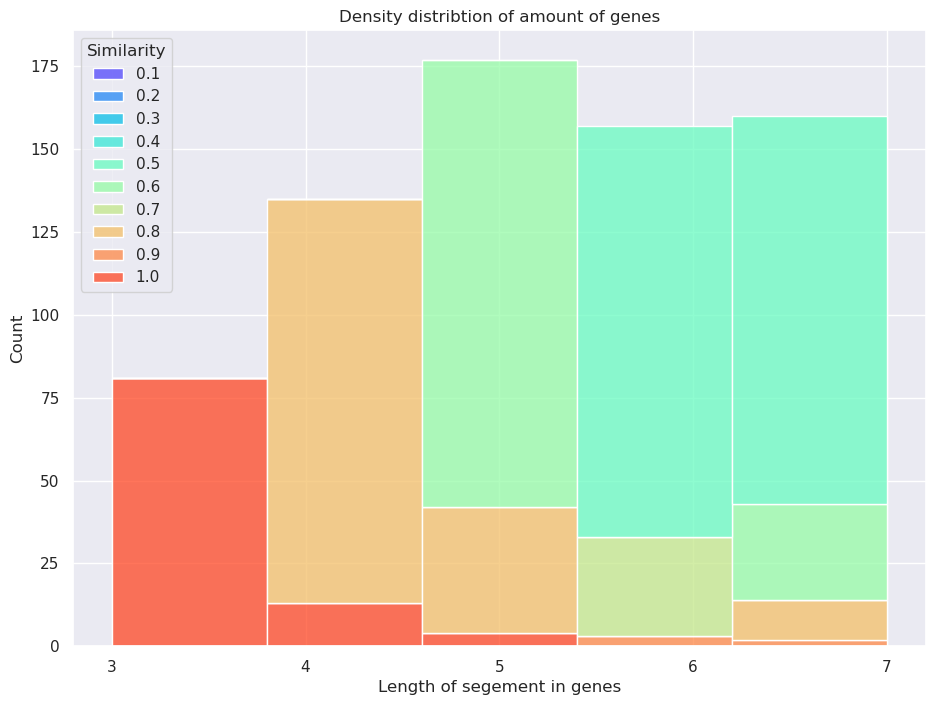

In [ ]:
so = sns.histplot(data=df_l7, x="max_profile_length", hue="cat_similar", multiple="stack", palette="rainbow", bins=5)
so.set(title="Density distribtion of amount of genes", xlabel="Length of segement in genes", ylabel="Count")
so.axes.get_legend().set_title("Similarity")
so.set_xticks([3, 4, 5, 6, 7])
so.set_xticklabels(["3", "4", "5", "6", "7"])
# plt.savefig(iadh_analysis_plots/"d_distri_segmentlength<7.png")
plt.show()

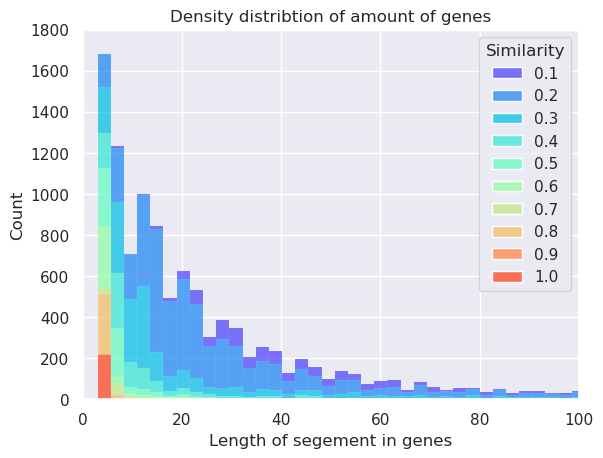

In [ ]:
# sns.set_theme(rc={'figure.figsize':(11,8)})
# so = sns.histplot(data=df[df["profile_length"]<100], x="profile_length", hue="cat_similar", multiple="stack", palette="rainbow", binwidth=2)
# so.set(title="Density distribtion of amount of genes", xlabel="Length of segement in genes", ylabel="Count")
# so.axes.get_legend().set_title("Similarity")
# so.set_xlim(0,100)
# so.set_ylim(0,900)
# plt.show()


so = sns.histplot(data=df, x="profile_length", hue="cat_similar", multiple="stack", palette="rainbow", log_scale=False)
so.set(title="Density distribtion of amount of genes", xlabel="Length of segement in genes", ylabel="Count")
so.axes.get_legend().set_title("Similarity")
so.set_xlim(0,100)
so.set_ylim(0,1800)
# plt.savefig(iadh_analysis_plots/"d_distri_segmentlength.png")
plt.show()


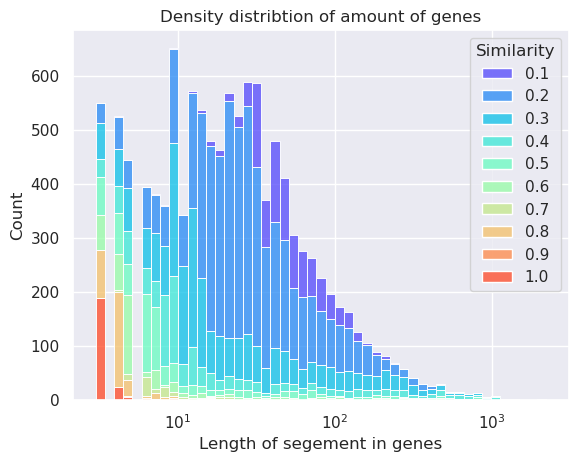

In [ ]:
so = sns.histplot(data=df, x="len_profile_x", hue="cat_similar", multiple="stack", palette="rainbow", log_scale=True)
so.set(title="Density distribtion of amount of genes", xlabel="Length of segement in genes", ylabel="Count")
so.axes.get_legend().set_title("Similarity")
# so.set_xlim(0,100)
# so.set_ylim(0,900)
# plt.savefig(iadh_analysis_plots/"d_distri_segmentlength_logscale.png")
plt.show()


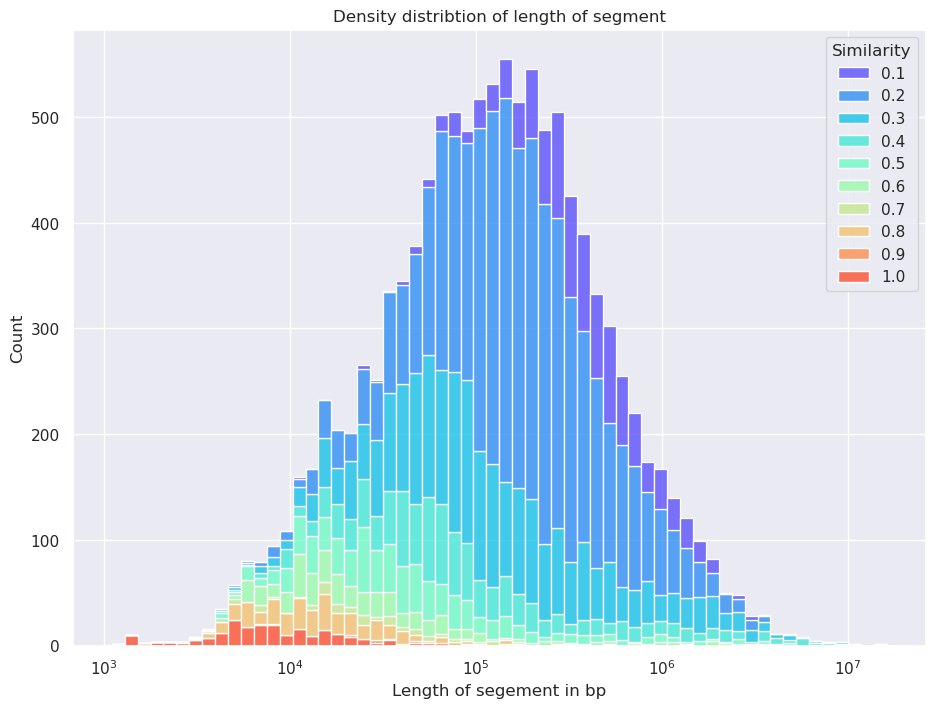

In [ ]:
sns.set_theme(rc={'figure.figsize':(11,8)})
so = sns.histplot(data=df, x="len_x", hue="cat_similar", multiple="stack", palette="rainbow", log_scale=True)
so.set(title="Density distribtion of length of segment", xlabel="Length of segement in bp", ylabel="Count")
so.axes.get_legend().set_title("Similarity")
# plt.savefig(iadh_analysis_plots/"d_distri_segmentlength_in_bp.png")

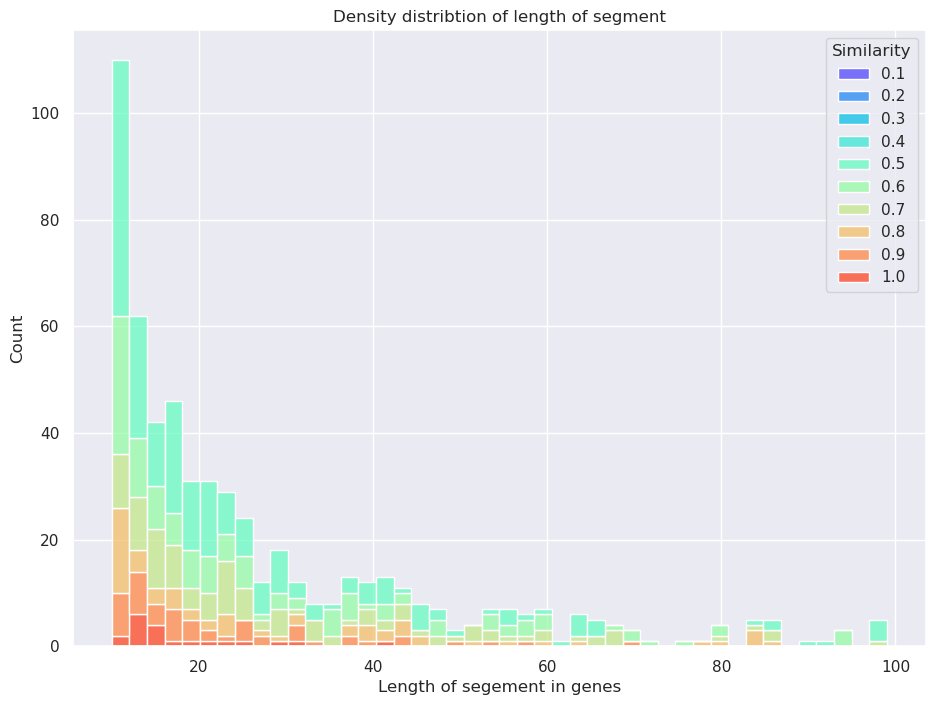

In [26]:
sns.set_theme(rc={'figure.figsize':(11,8)})
so = sns.histplot(data=df[(df["cat_similar"]>=0.5) & (df["profile_length"]>=10) & (df["profile_length"]<100)], x="profile_length", hue="cat_similar", multiple="stack", palette="rainbow", binwidth=2)
so.set(title="Density distribtion of length of segment", xlabel="Length of segement in genes", ylabel="Count")
so.axes.get_legend().set_title("Similarity")

# Old plots


[Text(0.5, 1.0, 'correlation between amouunt of genes and segement lengt in bp')]

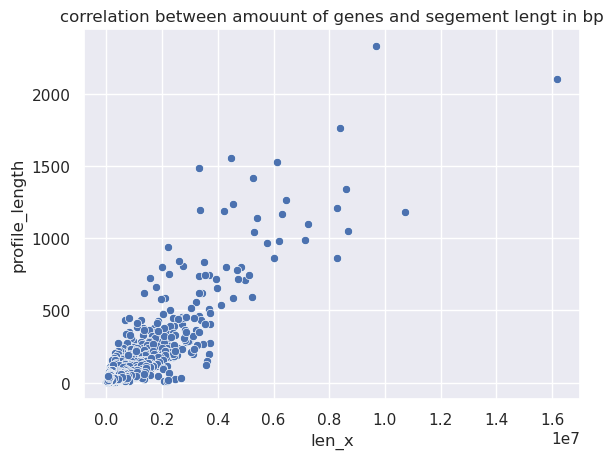

In [ ]:
so = sns.scatterplot(data=df, x="len_x", y="profile_length")
so.set(title="correlation between amouunt of genes and segement lengt in bp")
# so.set_xlim(0, 10000)
# so.set_ylim(0, 30)

(-100000.0, 10000000.0)

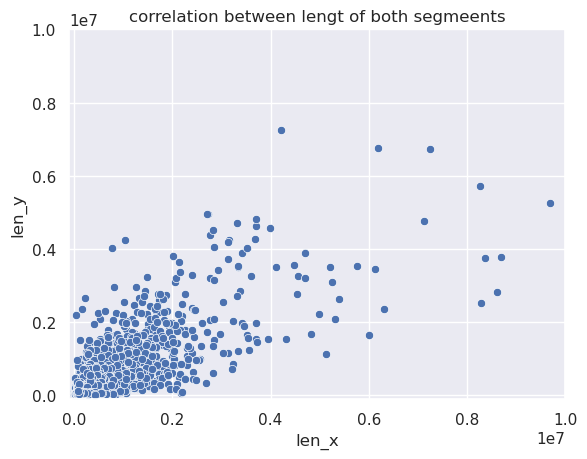

In [8]:
so = sns.scatterplot(data=df, x="len_x", y="len_y")
so.set(title="correlation between lengt of both segmeents")
so.set_xlim(-100000, 10000000)
so.set_ylim(-100000, 10000000)

<Axes: xlabel='percentage_similar', ylabel='Count'>

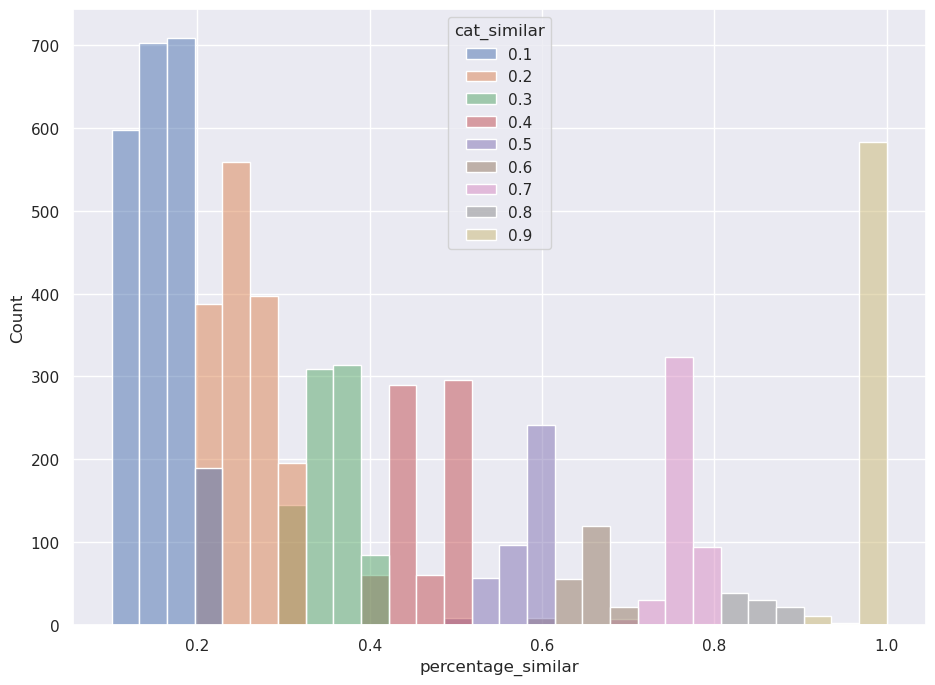

In [100]:
df.sort_values("percentage_similar", ascending=False)
sns.histplot(data=df, x="percentage_similar", hue="cat_similar")

# Old code


In [ ]:
print(df[(df["cat_similar"]>=0.3) & (df["profile_length"]>=10)].shape)
print(df.shape)

for i in [0.3, 0.4, 0.5, 0.6, 0.7]:
    for j in [4, 6, 8, 10, 12]:
        print(f"{i},{j}: ", df[(df["cat_similar"]>=i) & (df["profile_length"]>=j)].shape)

(2715, 25)
(7343, 25)
0.3,4:  (4367, 25)
0.3,6:  (3720, 25)
0.3,8:  (3189, 25)
0.3,10:  (2715, 25)
0.3,12:  (2264, 25)
0.4,4:  (2828, 25)
0.4,6:  (2181, 25)
0.4,8:  (1650, 25)
0.4,10:  (1176, 25)
0.4,12:  (1025, 25)
0.5,4:  (1975, 25)
0.5,6:  (1328, 25)
0.5,8:  (797, 25)
0.5,10:  (633, 25)
0.5,12:  (562, 25)
0.6,4:  (1269, 25)
0.6,6:  (622, 25)
0.6,8:  (462, 25)
0.6,10:  (400, 25)
0.6,12:  (348, 25)
0.7,4:  (867, 25)
0.7,6:  (420, 25)
0.7,8:  (305, 25)
0.7,10:  (261, 25)
0.7,12:  (230, 25)
